In [1]:
import sys
import os
path_helper = ["c:\\","Users","vfriedrich","projects","gating","reproducibility_cleaned","helper"]
sys.path.append(os.path.join(*path_helper))
import helper_reproducibility as hr
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import os
import re
import json
from pywget import wget
print(sys.executable)

C:\Users\vfriedrich\Anaconda3\envs\gating_env_local_parameter_option\python.exe


In [2]:
#convexgating==0.1.1 #branch add_parameter_option

In [3]:
pre = 'CITEseq_05_run_gating'
start_time = hr.get_time()

In [4]:
path_input_data = hr.return_input_data_path() 
path_output_data = hr.return_output_data_path()
path_output_script = os.path.join(path_output_data,pre)
hr.make_path(os.path.join(path_output_script))

path exists


In [5]:
path_CD16_CD4 = os.path.join(path_output_data,'CITEseq_03_subsample','pdata_CD16_CD4_sub_denoised_HLADR+.h5ad')
path_CD16_CD8 = os.path.join(path_output_data,'CITEseq_03_subsample','pdata_CD16_CD8_sub_denoised_HLADR+.h5ad')

## Full panel denoised

### CD4

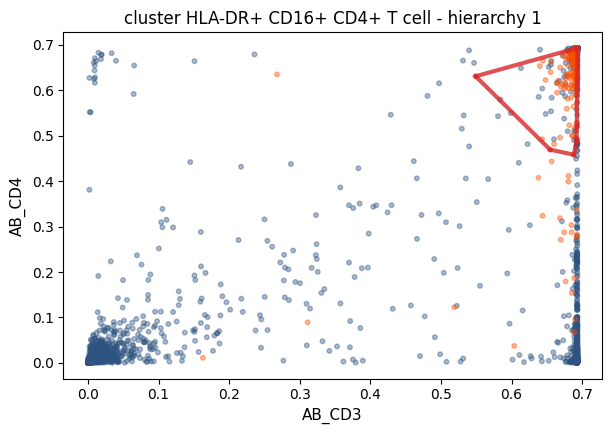

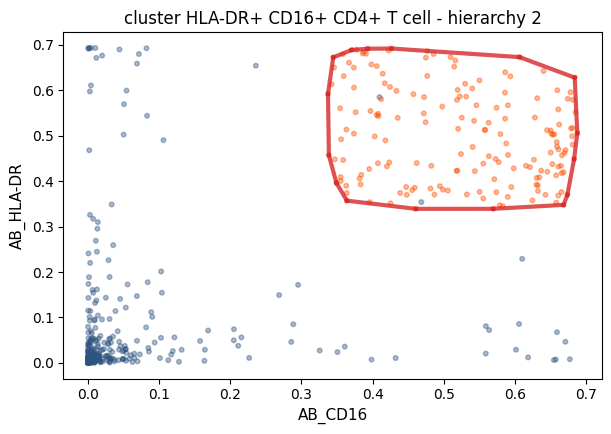

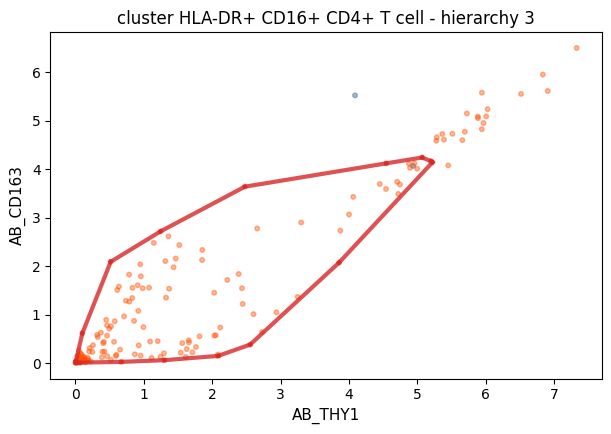

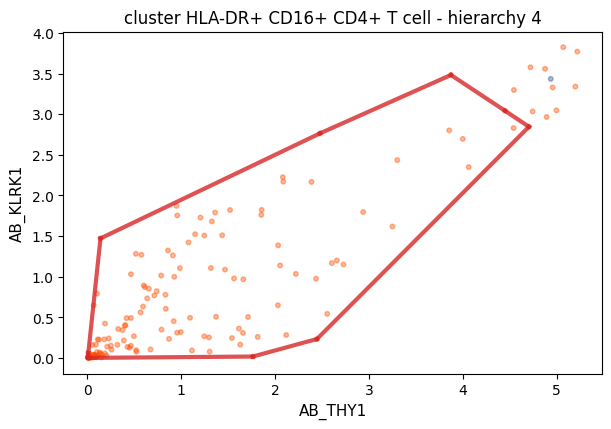

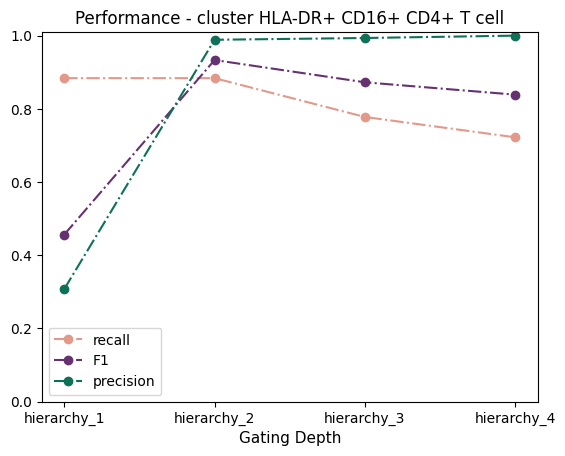

In [6]:
#CD4 denoised
adata = sc.read_h5ad(path_CD16_CD4)
sc.pp.log1p(adata)
adata = adata.copy()
cluster_string = 'HLA-DR+ CD16+ T cells'
target_cluster = 'HLA-DR+ CD16+ CD4+ T cell'
save = os.path.join(path_output_script,target_cluster)
cg.tools.CONVEX_GATING(adata=adata,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

### CD8

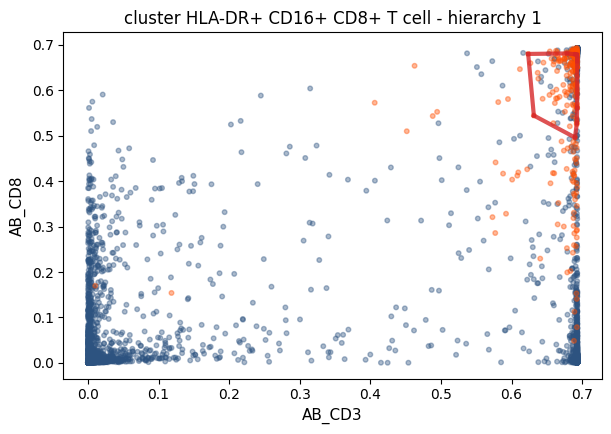

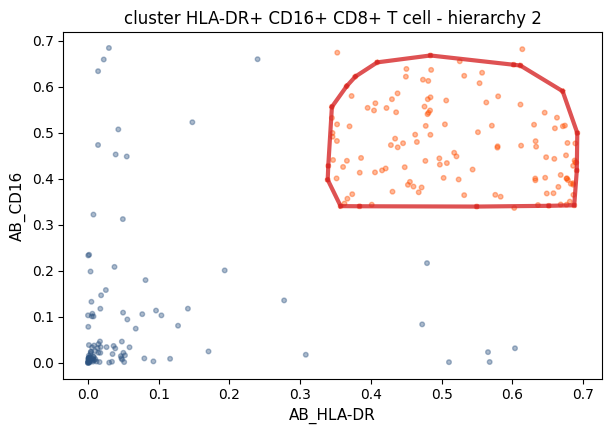

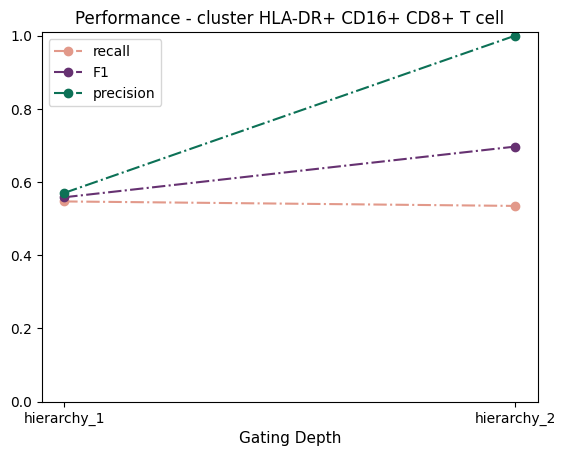

In [7]:
adata = sc.read_h5ad(path_CD16_CD8)
sc.pp.log1p(adata)
adata = adata.copy()
cluster_string = 'HLA-DR+ CD16+ T cells'
target_cluster = 'HLA-DR+ CD16+ CD8+ T cell'
save = os.path.join(path_output_script,target_cluster)
cg.tools.CONVEX_GATING(adata=adata,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

## FACS panel denoised

In [8]:
path_FACS_intersect = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility_cleaned\\main_Figure_bridge_gap\\Summary\\output_data\\summary_01\\summary_01_intersect_AB_citeseq_FACS.json'
with open(path_FACS_intersect, 'r') as f:
    FACS_panel = json.load(f)

### CD4

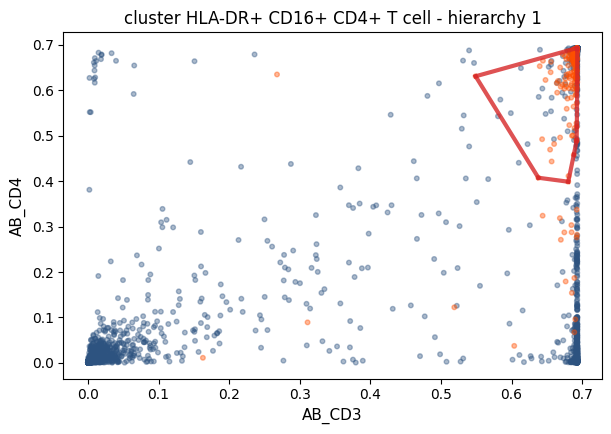

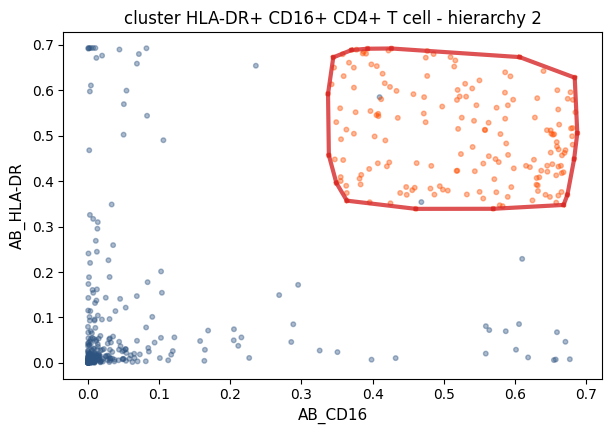

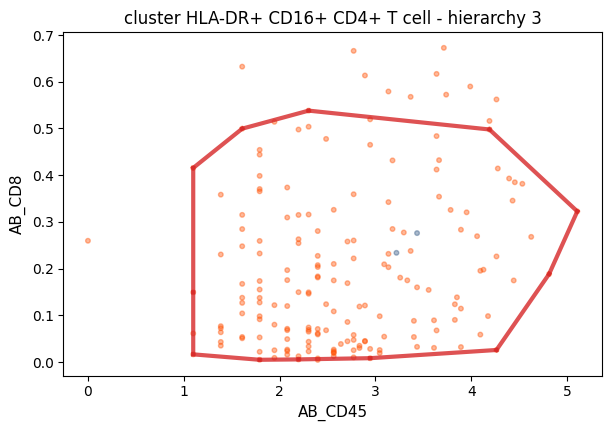

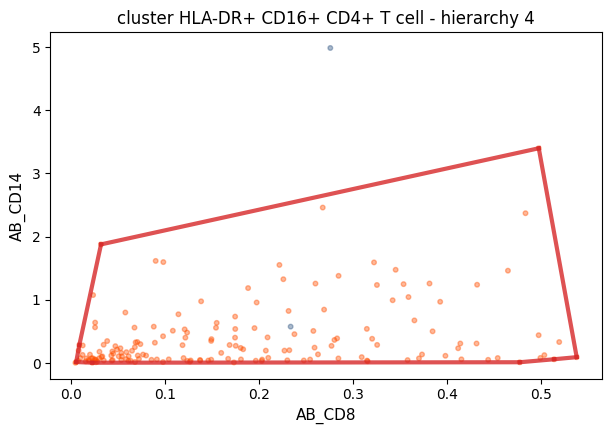

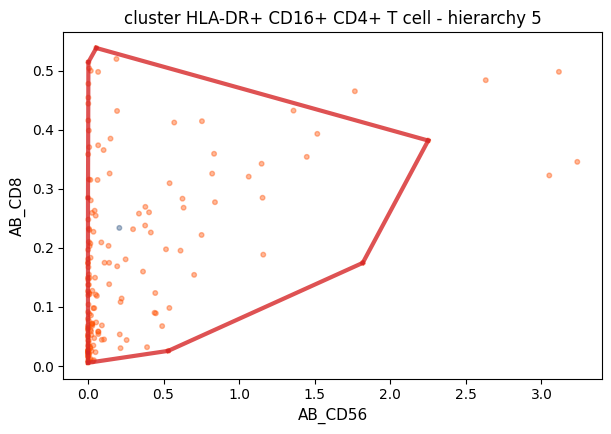

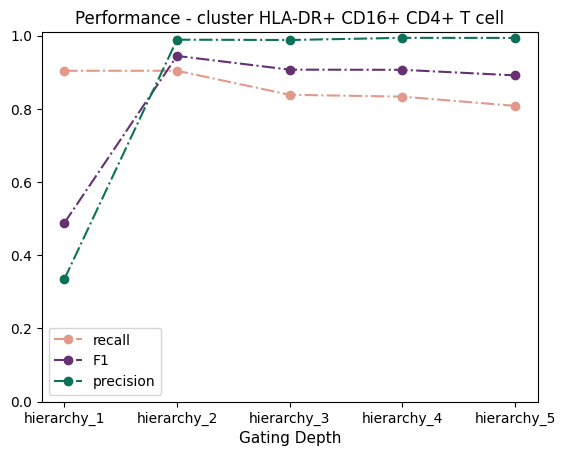

In [9]:
adata = sc.read_h5ad(path_CD16_CD4)
sc.pp.log1p(adata)
adata = adata[:,FACS_panel]
adata = adata.copy()
cluster_string = 'HLA-DR+ CD16+ T cells'
target_cluster = 'HLA-DR+ CD16+ CD4+ T cell'
save = os.path.join(path_output_script,target_cluster + '_FACS_panel')
cg.tools.CONVEX_GATING(adata=adata,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

### CD8

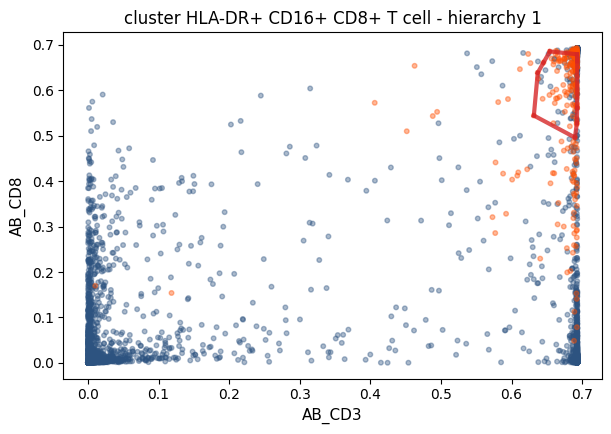

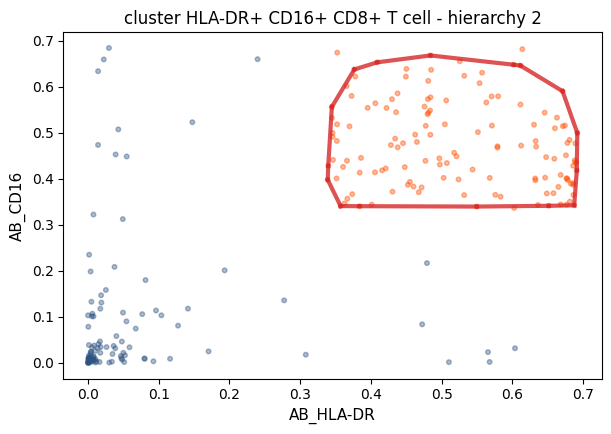

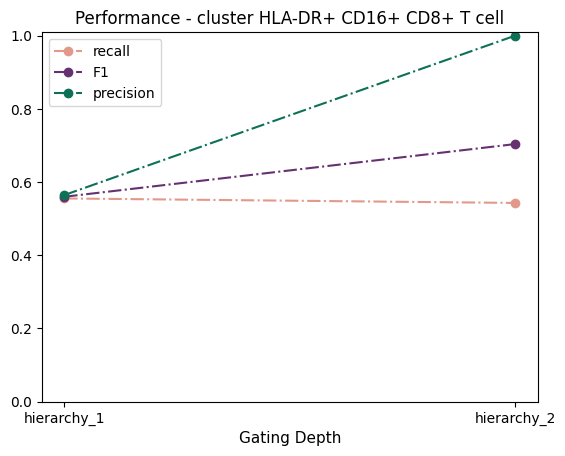

In [10]:
adata = sc.read_h5ad(path_CD16_CD8)
sc.pp.log1p(adata)
adata = adata[:,FACS_panel]
adata = adata.copy()
cluster_string = 'HLA-DR+ CD16+ T cells'
target_cluster = 'HLA-DR+ CD16+ CD8+ T cell'
save = os.path.join(path_output_script,target_cluster + '_FACS_panel')
cg.tools.CONVEX_GATING(adata=adata,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

## Joint CyTOF panel denoised

In [11]:
path_joint_panel = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility_cleaned\\main_Figure_bridge_gap\\Summary\\output_data\\summary_01\\summary_01_intersect_AB_citeseq.json'
with open(path_joint_panel, 'r') as f:
    joint_panel = json.load(f)

### CD4

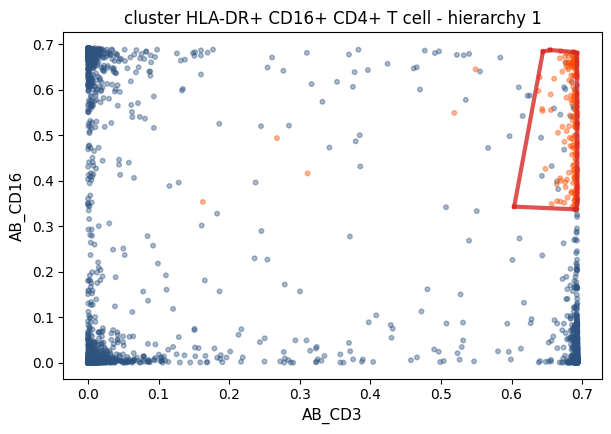

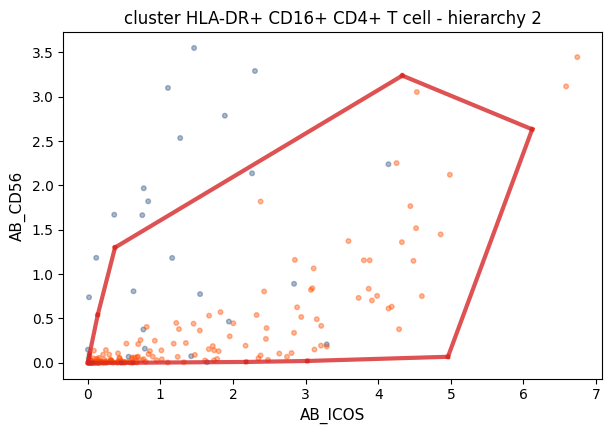

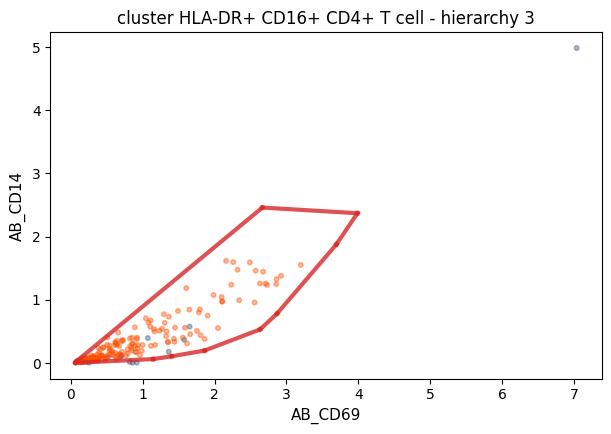

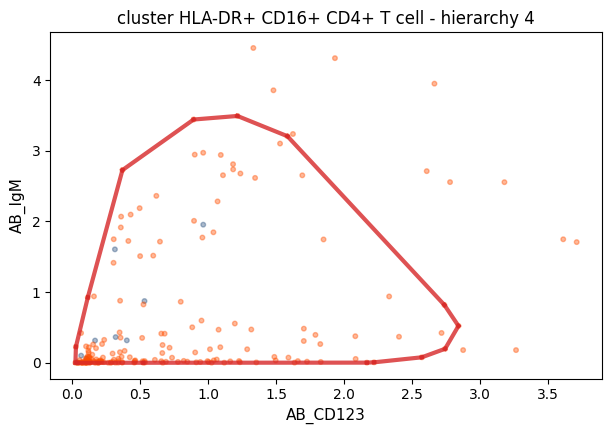

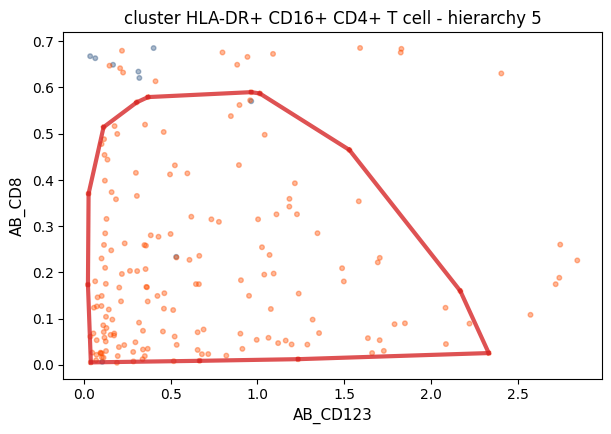

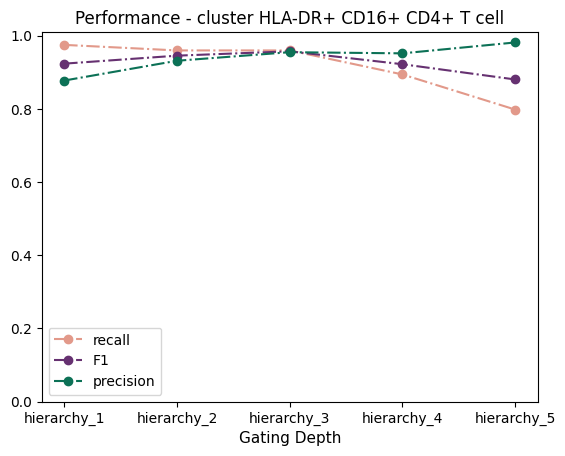

In [12]:
adata = sc.read_h5ad(path_CD16_CD4)
sc.pp.log1p(adata)
adata = adata[:,joint_panel]
adata = adata.copy()
cluster_string = 'HLA-DR+ CD16+ T cells'
target_cluster = 'HLA-DR+ CD16+ CD4+ T cell'
save = os.path.join(path_output_script,target_cluster + '_joint_panel')
cg.tools.CONVEX_GATING(adata=adata,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

### CD8

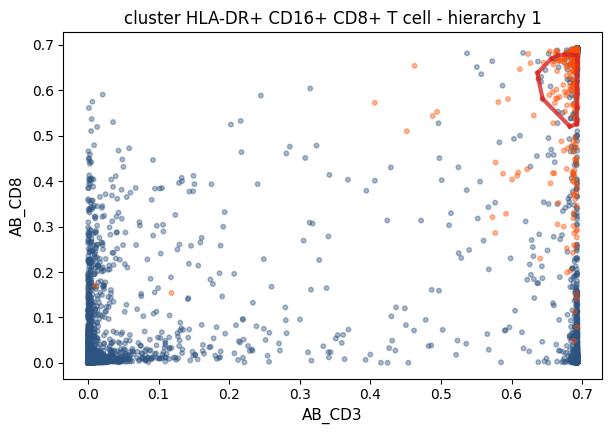

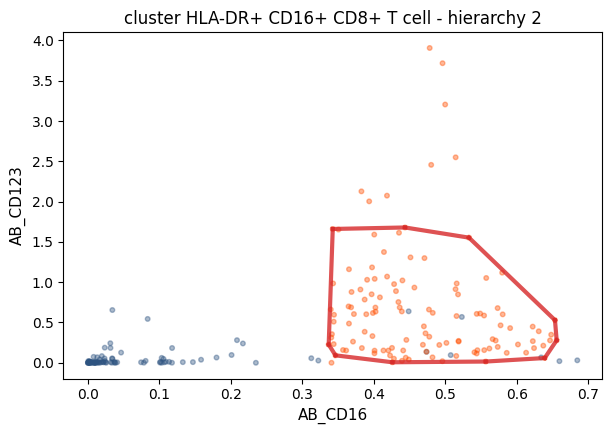

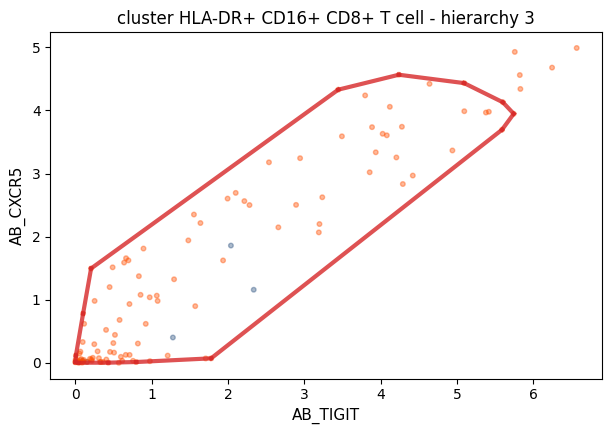

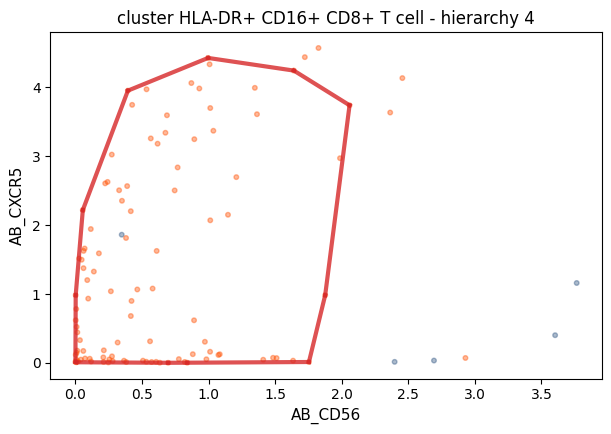

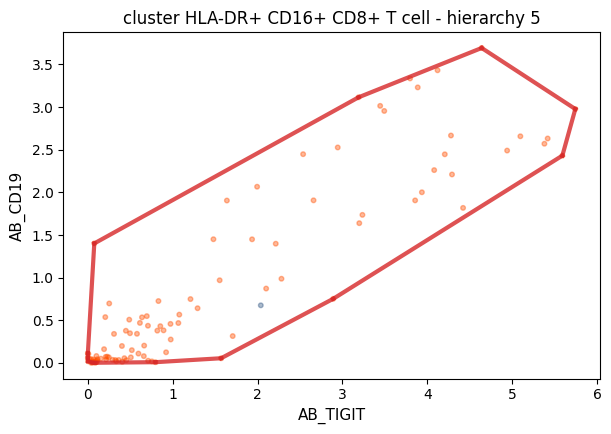

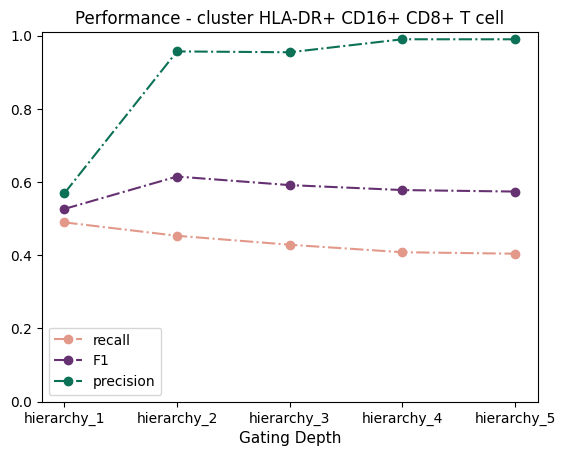

In [13]:
adata = sc.read_h5ad(path_CD16_CD8)
sc.pp.log1p(adata)
adata = adata[:,joint_panel]
adata = adata.copy()
cluster_string = 'HLA-DR+ CD16+ T cells'
target_cluster = 'HLA-DR+ CD16+ CD8+ T cell'
save = os.path.join(path_output_script,target_cluster + '_joint_panel')
cg.tools.CONVEX_GATING(adata=adata,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

## Save Session

In [14]:
hr.save_package_versions(hr.return_base_package_version_path(),pre = pre,do_print = True)
sc.logging.print_versions()
end_time = hr.get_time()
hr.get_time_delta(start_time,end_time,pre=pre,save=True)

babel==2.13.1
qtpy==2.4.1
sqlalchemy==2.0.23
send2trash==1.8.2
anyio==4.1.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fqdn==1.5.1
greenlet==3.0.1
idna==3.6
importlib-metadata==7.0.0
ipykernel==6.27.1
ipython==8.18.1
ipython-genutils==0.2.0
ipython-sql==0.5.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.2
jupyter==1.0.0
jupyter-client==8.6.0
jupyter-console==6.6.3
jupyter-core==5.5.0
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter-server==2.11.2
jupyter-server-terminals==0.4.4
jupyterlab==4.0.9
jupyterlab-pygments==0.3.0
jupyterlab-server==2.25.2
jupyterlab-widgets==3.0.9
matplotlib-inline==0.1.6


datetime.timedelta(seconds=150, microseconds=236882)